In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#First, read the txt by line and store the lines into a list object
lineList = []
with open("romeoandjuliet.txt") as f:
    for line in f:
        lineList.append(line)

In [3]:
#For each line, get rid of any punctuations and "\n" (line divider)
#Then split them into words and store into another list object
words = []
for l in lineList:
    l = l.replace(',','')
    l = l.replace('.','')
    l = l.replace('!','')
    l = l.replace('?','')
    l = l.replace('\n','')
    l = l.replace('[','')
    l = l.replace(']','')
    l = l.replace(';', '')
    l = l.lower()
    if len(l) != 0:
        new = l.split()
        for word in new:
            words.append(word)

In [4]:
#Now iterate through each word
#If the word is not already in the dictionary, create a new entry
#with the word as key and 1 as initial value
#If the word is already in the dictionary, add 1 to its value
romeo_dict = {}
for key in words:
    if key not in romeo_dict: 
        romeo_dict[key] = 1
    else:
        romeo_dict[key] +=1

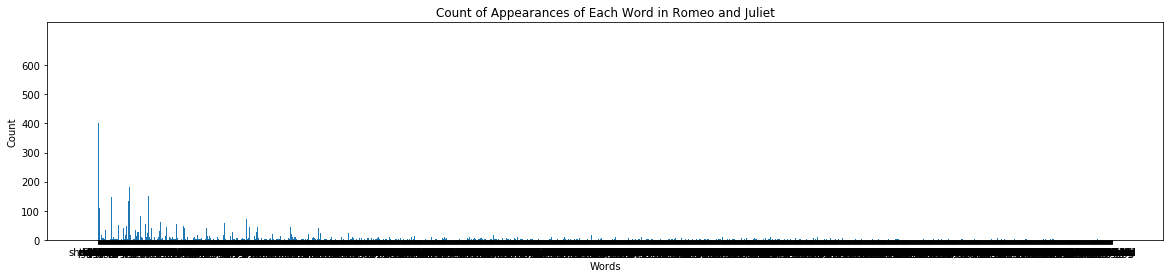

In [5]:
plt.figure(figsize=(20,4))
plt.bar(x = list(romeo_dict.keys()), height = list(romeo_dict.values()))
plt.yticks(np.arange(0, 700, 100))
plt.title("Count of Appearances of Each Word in Romeo and Juliet")
plt.xlabel('Words')
plt.ylabel('Count')
plt.show()

In [6]:
#Create a sorted dictionary according to decreasing word count
sorted_romeo = dict(sorted(romeo_dict.items(), key=lambda kv: kv[1], reverse=True))
sorted_words = list(sorted_romeo.keys())
ten_most_freq_words = sorted_words[0:10]
ten_least_freq_words = sorted_words[len(sorted_words)-10:len(sorted_words)]

In [7]:
ten_most_freq_words

['and', 'the', 'i', 'to', 'a', 'of', 'my', 'that', 'is', 'in']

In [8]:
ten_least_freq_words

['demand',
 'statue',
 'whiles',
 'figure',
 'lie-',
 'sacrifices',
 'glooming',
 "pardon'd",
 'punished',
 'omnes']

The ten most frequent words are the most used words in the play, which, also coincide with some of the most used words in English language in general. The ten least frequent words, on the other hand, are not extremely obsolete words. They simply may not be most prevalent to the setting or storyline of the play. 

In [9]:
rank_dict = {}
ind = 1
for key in sorted_words:
    rank_dict[ind] = sorted_romeo[key]
    ind += 1

In [10]:
log_rank = np.log(list(rank_dict.keys()))
log_count = np.log(list(rank_dict.values()))

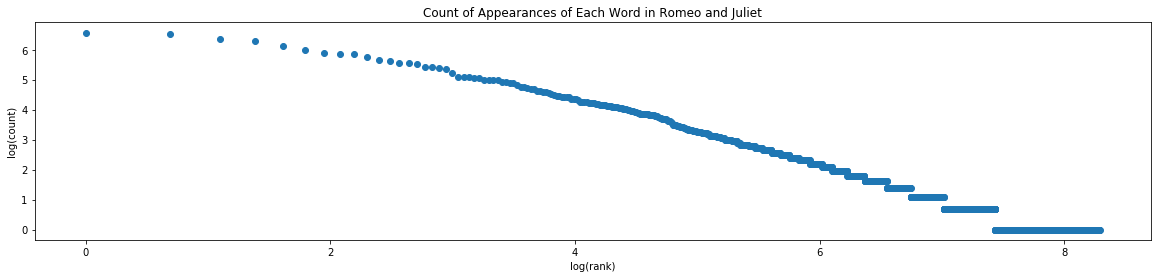

In [11]:
plt.figure(figsize=(20,4))
plt.scatter(log_rank, log_count)
plt.title("Count of Appearances of Each Word in Romeo and Juliet")
plt.xlabel('log(rank)')
plt.ylabel('log(count)')
plt.show()

The log-log scale plot of rank vs. count shows an approximate straight decreasing line, meaning count decreases as rank increases. This suggest the original rank vs. count relationship could be in the form of $y=ax^k$. In the log-log scale, this becomes $log(y) = log(a) + k log(x)$. From the graph we could roughly see that the slope k is roughly -1.3.